In [ ]:
import collections
import pandas as pd


animal_info_df = pd.DataFrame({"Animal_Id" : [],
                               "ts":[],
                               "pulse":[],
                               "oxygen":[],
                               "location_x":[],
                               "location_y":[],
                               "temp":[],
                               "humidity":[],
                               })

with open('./Dataset2/log_human_readable.txt') as f:
    lines = f.readlines()
    
    steps = int(len(lines)/12)
    print(steps)
    for i in range(steps):
        dataset = lines[12*i: (i + 1)*12]

        dataset = list(map(lambda x: x.replace('\n', '').replace('"','').replace('\t','').replace(' ',''), dataset))
        animal = dataset[0].split('===============')[1]
        ts = dataset[2].split(':')[1]          
        ts = float(ts)
        pulseOxygenReadings = dataset[4].split(':')[1]
        if pulseOxygenReadings == 'NaN':
            continue

        pulseOxygen = list(map(lambda x: float(x), dataset[4].split(':')[1][1:-1].split(',')))
        location = list(map(lambda x: float(x), dataset[6].split(':')[1][1:-1].split(',')))
        temp = float(dataset[8].split(':')[1])
        humidity = float(dataset[10].split(':')[1])

        pulse = pulseOxygen[0]
        oxygen = pulseOxygen[1]
        
        animal_info_df.loc[len(animal_info_df.index)] = [animal, ts, pulse, oxygen, location[0], location[1], temp, humidity]
           

print(animal_info_df)



36873


In [2]:
import seaborn as sns

<AxesSubplot:xlabel='ts', ylabel='pulse'>

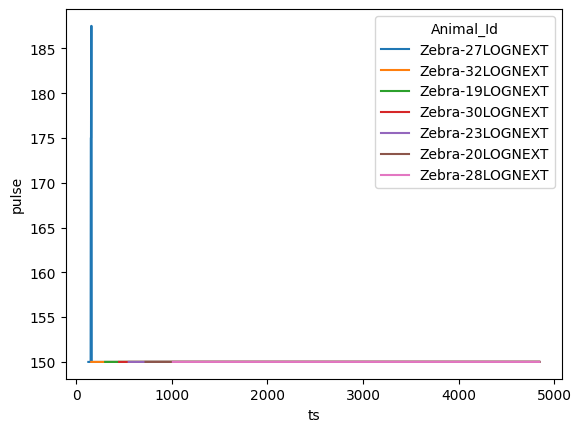

In [18]:
zebra_info_df = animal_info_df[animal_info_df['Animal_Id'].str.contains('Zebra')]
# compare_vehicle_df.vehicle_id.unique() 

# print(zebra_info_df)
# 
sns.lineplot(data=zebra_info_df, x='ts', y='pulse',hue='Animal_Id')

<AxesSubplot:xlabel='ts', ylabel='oxygen'>

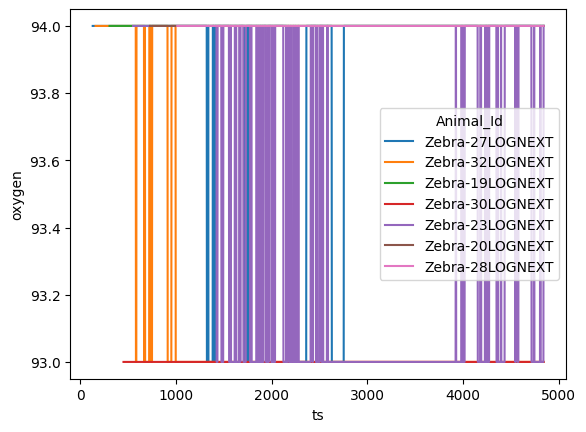

In [4]:
sns.lineplot(data=zebra_info_df, x='ts', y='oxygen',hue='Animal_Id')

<AxesSubplot:xlabel='location_x', ylabel='location_y'>

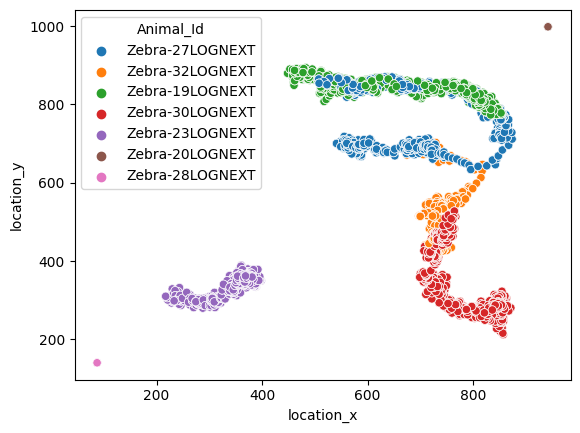

In [5]:
sns.scatterplot(data=zebra_info_df, x='location_x', y='location_y',hue='Animal_Id')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


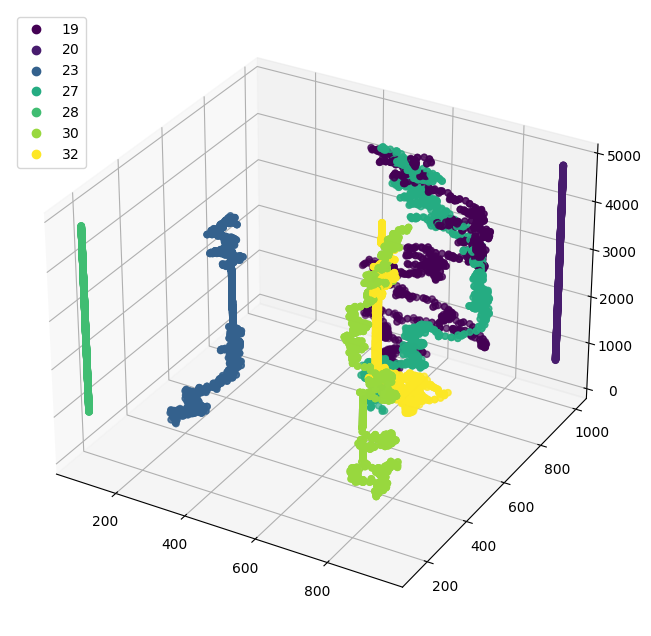

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib.colors import ListedColormap


fig = plt.figure(figsize=(8, 8))

zebra_info_df['hue'] = zebra_info_df['Animal_Id'].apply(lambda x: int(x.split('-')[1].split('LOGNEXT')[0]))

ax = fig.add_subplot(111, projection='3d')
plot_3d = ax.scatter(zebra_info_df['location_x'], zebra_info_df['location_y'], zebra_info_df['ts'], 
           c=zebra_info_df['hue'])

plt.legend(*plot_3d.legend_elements())

plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/collections.py:1098: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


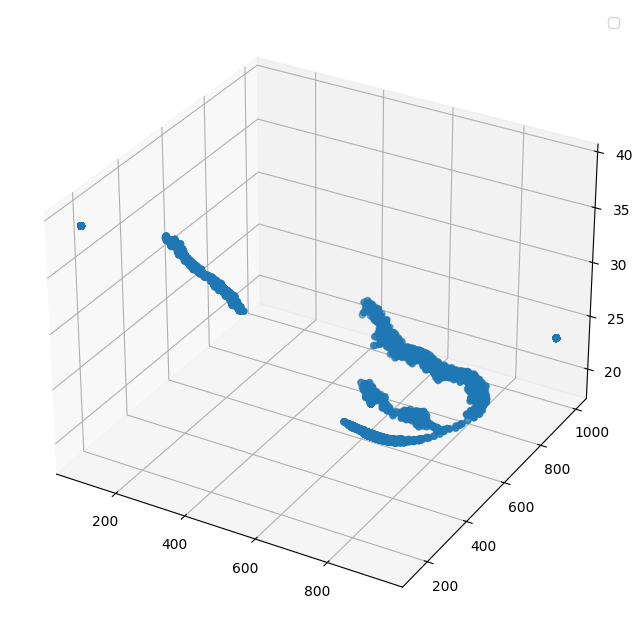

In [7]:
# zebra_info_df['hue'] = zebra_info_df['Animal_Id'].apply(lambda x: int(x.split('-')[1].split('LOGNEXT')[0]))

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')
plot_3d = ax.scatter(zebra_info_df['location_x'], zebra_info_df['location_y'], zebra_info_df['humidity'])

plt.legend(*plot_3d.legend_elements())

plt.show()

<AxesSubplot:xlabel='location_x', ylabel='location_y'>

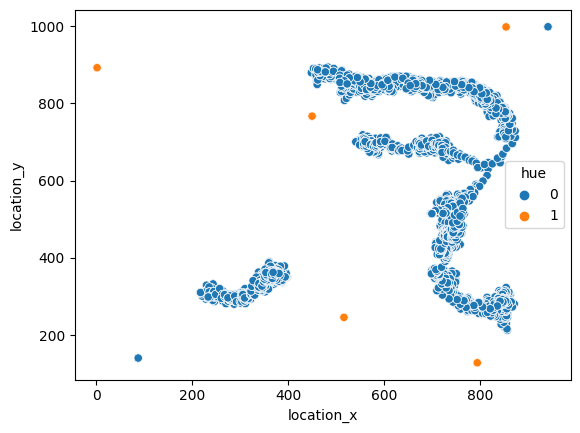

In [8]:
def classify(x):
    if 'Lion' in x:
        return 1
    
    if 'Zebra' in x:
        return 0
    
    return -1

animal_info_df['hue'] = animal_info_df['Animal_Id'].apply(lambda x: classify(x))

animal_lion_zebra_df = animal_info_df[animal_info_df['hue'].isin([1, 0])]

sns.scatterplot(data=animal_lion_zebra_df, x='location_x', y='location_y',hue='hue')

In [24]:
#CDF of speed for zebra
import numpy as np
import matplotlib.pyplot as plt
import math


def get_cdf_zebra_speeds(zebra_id, df):

    df = df[df['Animal_Id'] == zebra_id].sort_values('ts')

    zebra_ts = df['ts'].to_list()
    zebra_x = df['location_x'].to_list()
    zebra_y = df['location_y'].to_list()

    zebra_speeds = []

    for i in range(1, len(zebra_ts)):
        delta_t = zebra_ts[i] - zebra_ts[i - 1]
        distance = math.sqrt((zebra_x[i] - zebra_x[i - 1])**2 + (zebra_y[i] - zebra_y[i - 1])**2)
        speed = distance/delta_t
        zebra_speeds.append(speed)

    count, bins_count = np.histogram(zebra_speeds, bins=10)
    
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    plt.plot(bins_count[1:], pdf, label=zebra_id)

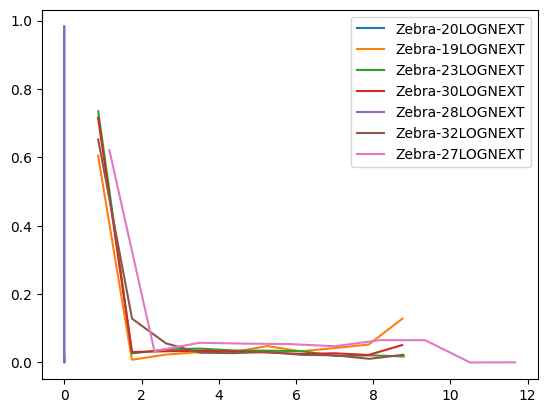

In [26]:
zebra_ids = set(zebra_info_df['Animal_Id'].to_list())

for zebra_id in zebra_ids:
    get_cdf_zebra_speeds(zebra_id, zebra_info_df)

plt.legend()